# **TUGAS 2**


1. Carilah data yang bertipe numerik ( data klassifikasi)
2. Lakukan proses diskritisasi dengan *equal width* dan *equal frequency*
3. Lakukan proses diskritisasi dengan basis *entropy*
4. Kumpulkan tugas dengan link github ( web statis dari jupyter book)


## **Cari data**

sumber
[Data Bunga Iris](https://raw.githubusercontent.com/HanifSantoso05/dataset_matkul/main/Iris.csv)

In [ ]:
import pandas as pd
import numpy as np
import random

In [ ]:
# source data
dataset_url = "https://raw.githubusercontent.com/HanifSantoso05/dataset_matkul/main/Iris.csv"

In [ ]:
# Create dataframe
df = pd.read_csv(dataset_url)

In [ ]:
# Menampilkan dataset iris
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# show first 15 rows
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
# CONSTAN SERIES

sepal_length_type = df["SepalLengthCm"]
sepal_width_type = df["SepalWidthCm"]
petal_length_type = df["PetalLengthCm"]
petal_width_type = df["PetalWidthCm"]
species = df["Species"]

## **Hitung Data**


### Definisi *discretization*

1. Proses mengubah data bertipe data *numeric* menjadi data bertipe *categorical*
2. Diskritisasi memiliki 2 pendekatan yaitu *equal-width intervals* dan *equal-frequency intervals*
3. *equal-width intervals* adalah diskritisasi dengan lebar data yang sama
4. *equal-frequency intervals* adalah diskritisasi dengan jumlah data yang sama

##### 2. Lakukan proses diskritisasi dengan *equal width* dan *equal frequency*

##### Cut

2. Lakukan proses diskritisasi dengan *equal width* dan *equal frequency*


```
# Syntax
pd.cut(series, interval, right=True, label)
```


###### Sepal Width

* Equal Width Intervals lebar kelopak bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu 
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-width intervals

labels = ["Sedikit Besar", "Besar", "Sangat Besar"]
amount_of_binning = len(labels)

sepal_width_ew_binning = pd.cut(sepal_width_type, amount_of_binning, True, labels)
labelled_sepal_width_ew_binning = sepal_width_ew_binning.value_counts()
interval_sepal_width_ew_binning = pd.cut(sepal_width_type, amount_of_binning, True).value_counts()

In [ ]:
# dataframe of sepal-width and sepal category
pd.concat((sepal_width_type, sepal_width_ew_binning), axis=1)

,SepalWidthCm,SepalWidthCm
0,3.5,Besar
1,3.0,Besar
2,3.2,Besar
3,3.1,Besar
4,3.6,Besar
...,...,...
145,3.0,Besar
146,2.5,Sedikit Besar
147,3.0,Besar
148,3.4,Besar


In [ ]:
# equal-width intervals binning with label
labelled_sepal_width_ew_binning

Besar            88
Sedikit Besar    47
Sangat Besar     15
Name: SepalWidthCm, dtype: int64

In [ ]:
# equal-width intervals without label
interval_sepal_width_ew_binning

(2.8, 3.6]      88
(1.998, 2.8]    47
(3.6, 4.4]      15
Name: SepalWidthCm, dtype: int64

###### Petal Width

* Equal Width Intervals lebar mahkota bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu 
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-width intervals
labels = ["Sedikit Besar", "Besar", "Sangat Besar"]
amount_of_binning = len(labels)

petal_width_ew_binning = pd.cut(petal_width_type, amount_of_binning, True, labels)
labelled_petal_width_ew_binning = petal_width_ew_binning.value_counts()
interval_petal_width_ew_binning = pd.cut(petal_width_type, amount_of_binning, True).value_counts()

In [ ]:
# dataframe of petal-width and petal category
pd.concat((petal_width_type, petal_width_ew_binning), axis=1)

,PetalWidthCm,PetalWidthCm
0,0.2,Sedikit Besar
1,0.2,Sedikit Besar
2,0.2,Sedikit Besar
3,0.2,Sedikit Besar
4,0.2,Sedikit Besar
...,...,...
145,2.3,Sangat Besar
146,1.9,Sangat Besar
147,2.0,Sangat Besar
148,2.3,Sangat Besar


In [ ]:
# equal-width intervals with label
labelled_petal_width_ew_binning

Besar            54
Sedikit Besar    50
Sangat Besar     46
Name: PetalWidthCm, dtype: int64

In [ ]:
# equal-width intervals without label
interval_petal_width_ew_binning

(0.9, 1.7]       54
(0.0976, 0.9]    50
(1.7, 2.5]       46
Name: PetalWidthCm, dtype: int64

###### Sepal Length

* Equal Width Intervals panjang kelopak bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu 
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-width intervals

labels = ["Sedikit Besar", "Besar", "Sangat Besar"]
amount_of_binning = len(labels)

sepal_length_ew_binning = pd.cut(sepal_length_type, amount_of_binning, True, labels)
labelled_sepal_length_ew_binning = sepal_length_ew_binning.value_counts()
interval_sepal_length_ew_binning = pd.cut(sepal_length_type, amount_of_binning, True).value_counts()

In [ ]:
# dataframe of sepal-width and sepal category
pd.concat((sepal_length_type, sepal_length_ew_binning), axis=1)

,SepalLengthCm,SepalLengthCm
0,5.1,Sedikit Besar
1,4.9,Sedikit Besar
2,4.7,Sedikit Besar
3,4.6,Sedikit Besar
4,5.0,Sedikit Besar
...,...,...
145,6.7,Besar
146,6.3,Besar
147,6.5,Besar
148,6.2,Besar


In [ ]:
# equal-width intervals with label
labelled_sepal_length_ew_binning

Besar            71
Sedikit Besar    59
Sangat Besar     20
Name: SepalLengthCm, dtype: int64

In [ ]:
# equal-width intervals without label
interval_sepal_length_ew_binning

(5.5, 6.7]      71
(4.296, 5.5]    59
(6.7, 7.9]      20
Name: SepalLengthCm, dtype: int64

###### Petal Length

* Equal Width Intervals panjang mahkota bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu 
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-width intervals
labels = ["Sedikit Besar", "Besar", "Sangat Besar"]
amount_of_binning = len(labels)

petal_length_ew_binning = pd.cut(petal_length_type, amount_of_binning, True, labels)
labelled_petal_length_ew_binning = petal_length_ew_binning.value_counts()
interval_petal_length_ew_binning = pd.cut(petal_length_type, amount_of_binning, True).value_counts()

In [ ]:
# dataframe of petal-width and petal category
pd.concat((petal_length_type,petal_length_ew_binning), axis=1)

,PetalLengthCm,PetalLengthCm
0,1.4,Sedikit Besar
1,1.4,Sedikit Besar
2,1.3,Sedikit Besar
3,1.5,Sedikit Besar
4,1.4,Sedikit Besar
...,...,...
145,5.2,Sangat Besar
146,5.0,Sangat Besar
147,5.2,Sangat Besar
148,5.4,Sangat Besar


In [ ]:
# equal-width intervals binning with label
labelled_petal_length_ew_binning

Besar            54
Sedikit Besar    50
Sangat Besar     46
Name: PetalLengthCm, dtype: int64

In [ ]:
# equal-width intervals out label
interval_petal_length_ew_binning

(2.967, 4.933]    54
(0.994, 2.967]    50
(4.933, 6.9]      46
Name: PetalLengthCm, dtype: int64

##### Data Categorycal

In [ ]:
pd.concat((petal_width_ew_binning, sepal_width_ew_binning, sepal_length_ew_binning, petal_length_ew_binning), axis=1)

,PetalWidthCm,SepalWidthCm,SepalLengthCm,PetalLengthCm
0,Sedikit Besar,Besar,Sedikit Besar,Sedikit Besar
1,Sedikit Besar,Besar,Sedikit Besar,Sedikit Besar
2,Sedikit Besar,Besar,Sedikit Besar,Sedikit Besar
3,Sedikit Besar,Besar,Sedikit Besar,Sedikit Besar
4,Sedikit Besar,Besar,Sedikit Besar,Sedikit Besar
...,...,...,...,...
145,Sangat Besar,Besar,Besar,Sangat Besar
146,Sangat Besar,Sedikit Besar,Besar,Sangat Besar
147,Sangat Besar,Besar,Besar,Sangat Besar
148,Sangat Besar,Besar,Besar,Sangat Besar


##### Qcut
* Qcut adalah sebuah *method* pada library *pandas* untuk melakukan perhitungan *equal frequency intervals*

```
# Syntax
pd.qcut(series, interval, label)
```

###### Sepal Width

* Equal Frequency Intervals lebar kelopak bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu 
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-frequency intervals

labels = ["Sedikit Besar", "Besar", "Sangat Besar"]
amount_of_binning = len(labels)

sepal_width_ef_binning = pd.qcut(sepal_width_type, amount_of_binning, labels)
labelled_sepal_width_ef_binning = sepal_width_ef_binning.value_counts()
interval_sepal_width_ef_binning = pd.qcut(sepal_width_type, amount_of_binning).value_counts()

In [ ]:
# dataframe of sepal-width and sepal category
pd.concat((sepal_width_type, sepal_width_ef_binning), axis = 1)

,SepalWidthCm,SepalWidthCm
0,3.5,Sangat Besar
1,3.0,Besar
2,3.2,Besar
3,3.1,Besar
4,3.6,Sangat Besar
...,...,...
145,3.0,Besar
146,2.5,Sedikit Besar
147,3.0,Besar
148,3.4,Sangat Besar


In [ ]:
# equal-frequency intervals binning with label
labelled_sepal_width_ef_binning

Sedikit Besar    57
Besar            51
Sangat Besar     42
Name: SepalWidthCm, dtype: int64

In [ ]:
# equal-frequency intervals out label
interval_sepal_width_ef_binning

(1.999, 2.9]    57
(2.9, 3.2]      51
(3.2, 4.4]      42
Name: SepalWidthCm, dtype: int64

###### Petal Width

* Equal Frequency Intervals lebar mahkota bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu 
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-frequency intervals

labels = ["Sedikit Besar", "Besar", "Sangat Besar"]
amount_of_binning = len(labels)

petal_width_ef_binning = pd.qcut(petal_width_type, amount_of_binning, labels)
labelled_petal_width_ef_binning = petal_width_ef_binning.value_counts()
interval_petal_width_ef_binning = pd.qcut(petal_width_type, amount_of_binning).value_counts()

In [ ]:
# dataframe of petal-width and petal category
pd.concat((petal_width_type, petal_width_ef_binning), axis = 1)

,PetalWidthCm,PetalWidthCm
0,0.2,Sedikit Besar
1,0.2,Sedikit Besar
2,0.2,Sedikit Besar
3,0.2,Sedikit Besar
4,0.2,Sedikit Besar
...,...,...
145,2.3,Sangat Besar
146,1.9,Sangat Besar
147,2.0,Sangat Besar
148,2.3,Sangat Besar


In [ ]:
# equal-frequency intervals binning with label
labelled_petal_width_ef_binning

Besar            52
Sedikit Besar    50
Sangat Besar     48
Name: PetalWidthCm, dtype: int64

In [ ]:
# equal-frequency intervals without label
interval_petal_width_ef_binning

(0.867, 1.6]      52
(0.099, 0.867]    50
(1.6, 2.5]        48
Name: PetalWidthCm, dtype: int64

###### Sepal Length

* Equal Frequency Intervals panjang kelopak bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu 
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-frequency intervals

labels = ["Sedikit Besar", "Besar", "Sangat Besar"]
amount_of_binning = len(labels)

sepal_length_ef_binning = pd.qcut(sepal_length_type, amount_of_binning, labels)
labelled_sepal_length_ef_binning = sepal_length_ef_binning.value_counts()
interval_sepal_length_ef_binning = pd.qcut(sepal_length_type, amount_of_binning).value_counts()

In [ ]:
# dataframe of sepal-length and sepal category
pd.concat((sepal_length_type, sepal_length_ef_binning), axis=1)

,SepalLengthCm,SepalLengthCm
0,5.1,Sedikit Besar
1,4.9,Sedikit Besar
2,4.7,Sedikit Besar
3,4.6,Sedikit Besar
4,5.0,Sedikit Besar
...,...,...
145,6.7,Sangat Besar
146,6.3,Besar
147,6.5,Sangat Besar
148,6.2,Besar


In [ ]:
# equal-frequency intervals binning with label
labelled_sepal_length_ef_binning

Besar            56
Sedikit Besar    52
Sangat Besar     42
Name: SepalLengthCm, dtype: int64

In [ ]:
# equal-frequency intervals out label
interval_sepal_length_ef_binning

(5.4, 6.3]                   56
(4.2989999999999995, 5.4]    52
(6.3, 7.9]                   42
Name: SepalLengthCm, dtype: int64

###### Petal Length

* Equal Frequency Intervals panjang mahkota bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu 
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-frequency intervals

labels = ["Sedikit Besar", "Besar", "Sangat Besar"]
amount_of_binning = len(labels)

petal_length_ef_binning = pd.qcut(petal_length_type, amount_of_binning, labels)
labelled_petal_length_ef_binning = petal_length_ef_binning.value_counts()
interval_petal_length_ef_binning = pd.qcut(petal_length_type, amount_of_binning).value_counts()

In [ ]:
# dataframe of petal-length and petal category
pd.concat((petal_length_type, petal_length_ef_binning), axis=1)

,PetalLengthCm,PetalLengthCm
0,1.4,Sedikit Besar
1,1.4,Sedikit Besar
2,1.3,Sedikit Besar
3,1.5,Sedikit Besar
4,1.4,Sedikit Besar
...,...,...
145,5.2,Sangat Besar
146,5.0,Sangat Besar
147,5.2,Sangat Besar
148,5.4,Sangat Besar


In [ ]:
# equal-frequency intervals binning with label
labelled_petal_length_ef_binning

Besar            54
Sedikit Besar    50
Sangat Besar     46
Name: PetalLengthCm, dtype: int64

In [ ]:
# equal-frequency intervals out label
interval_petal_length_ef_binning

(2.633, 4.9]      54
(0.999, 2.633]    50
(4.9, 6.9]        46
Name: PetalLengthCm, dtype: int64

##### Data Categorycal

In [ ]:
pd.concat((petal_width_ef_binning, sepal_width_ef_binning, sepal_length_ef_binning, petal_length_ef_binning), axis=1)

,PetalWidthCm,SepalWidthCm,SepalLengthCm,PetalLengthCm
0,Sedikit Besar,Sangat Besar,Sedikit Besar,Sedikit Besar
1,Sedikit Besar,Besar,Sedikit Besar,Sedikit Besar
2,Sedikit Besar,Besar,Sedikit Besar,Sedikit Besar
3,Sedikit Besar,Besar,Sedikit Besar,Sedikit Besar
4,Sedikit Besar,Sangat Besar,Sedikit Besar,Sedikit Besar
...,...,...,...,...
145,Sangat Besar,Besar,Sangat Besar,Sangat Besar
146,Sangat Besar,Sedikit Besar,Besar,Sangat Besar
147,Sangat Besar,Besar,Sangat Besar,Sangat Besar
148,Sangat Besar,Sangat Besar,Besar,Sangat Besar


#### 3. Lakukan proses diskritisasi dengan basis *entropy*

**ENTROPY**

Diskritisasi berbasis entropi (entropy based discretization) adalah salah satu jenis algoritma diskritisasi terawasi yang menggunakan mekanisme top- down. Tujuan dari algoritma ini adalah mendapatkan partisi yang mengandung baris data dari kelas yang sama sebanyak mungkin.

* RUMUS ENTROPY

  ![image.png](https://cdn.mathpix.com/snip/images/T3MAnkOgvu54ASi68sQ5fR96rPCLPxjYofOqC9L4IpM.original.fullsize.png)



* RUMUS GAIN

  ![image.png](https://cdn.mathpix.com/snip/images/T6pg-dpJKT4PsSKzNdI_sQWFKj1kZao_9Oaf5-Zf88g.original.fullsize.png)

* RUMUS INFO
  
  ![image.png](https://cdn.mathpix.com/snip/images/iFDk6peaL_uAebWnVWZebfy9CvJ0VNADb8ukE2Nmyds.original.fullsize.png)

Menambahkan sempel data yang akan di hitung

In [ ]:
sample = df[["SepalLengthCm"]]
sample.describe()

,SepalLengthCm
count,150.000000
mean,5.843333
std,0.828066
min,4.300000
25%,5.100000
50%,5.800000
75%,6.400000
max,7.900000


Membuat kategori secara random untuk data sempel

In [ ]:
np.random.seed(0)
sample["kategori"] = np.where(np.random.choice(2,sample.shape[0]) < 1,"A","B")
sample

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SepalLengthCm,kategori
0,5.1,A
1,4.9,B
2,4.7,B
3,4.6,A
4,5.0,B
...,...,...
145,6.7,A
146,6.3,B
147,6.5,B
148,6.2,B


Membuat fungsi GetOverollCategory (keseluruhan) yang digunakan untuk menghitung data keseluruhan yang nantinya digunakan untuk menghitung entropy

In [ ]:
def GetOverollCategory(col):
  group = sample.loc[:, :].groupby("kategori").count()
  a = group.loc["A", col]
  b = group.loc["B", col]
  return (a,b,a+b)

Memasukan fungsi splitter yang digunakan untuk membuat split antara value yang telah ditentukan lalu mengembalikan data yang telah dipisahkan

In [ ]:
def splitter(value, col):
  #get data less and greater from value
  less = sample[sample[col] <= value]
  greater = sample[sample[col] > value]

  #calculate into category for each data
  less_group = less.loc[:, :].groupby("kategori").count()
  greater_group = greater.loc[:, :].groupby("kategori").count()

  #get value based on category
  less_category_A = less_group.loc["A",col]
  less_category_B = less_group.loc["B",col]
  greater_category_A = greater_group.loc["A",col]
  greater_category_B = greater_group.loc["B",col]

  return (
      [less_category_A, less_category_B, less_category_A + less_category_B],
      [greater_category_A, greater_category_B, greater_category_A + greater_category_B]
  )

Membuat fungsi entropy untuk melakukan perhitungan entropy

In [ ]:
def entropy (d):
  r1 = (d[0] / d[2]) * np.log2(d[0] / d[2])
  r2 = (d[1] / d[2]) * np.log2(d[1] / d[2])
  return np.sum([r1, r2]) * -1

Membuat fungsi info dan gain

In [ ]:
def info(d):
  r1 = (d[0][2] / sample.shape[0]) * entropy(d[0])
  r2 = (d[1][2] / sample.shape[0]) * entropy(d[1])
  return r1 + r2

Fungsi gain untuk menghitung selisih antara entropy awal dengan yang baru

In [ ]:
def gain(Einitial, Enew):
  return Einitial - Enew

Membuat Dinitial

In [ ]:
D = GetOverollCategory("SepalLengthCm")
entropy_d = entropy(D)
print(D)
print(entropy_d)

(68, 82, 150)
0.993707106604508


Melakukan beberapa fungsi split untuk mendapatkan informasi yang terbaik

##### SPLIT 1 : 4.5

In [ ]:
split1 = splitter(4.5, "SepalLengthCm")
info_split1 = info(split1)
gain(entropy_d, info_split1)

0.0069930419733333915

##### SPLIT 2 : 5.2

In [ ]:
split1 = splitter(5.2, "SepalLengthCm")
info_split1 = info(split1)
gain(entropy_d, info_split1)

0.025783795927140973

##### SPLIT 3 : 7.5

In [ ]:
split1 = splitter(7.5, "SepalLengthCm")
info_split1 = info(split1)
gain(entropy_d, info_split1)

0.0017898381837971877

Split terbaik yaitu split 3 yang memberikan keuntungan informasi sebesar 0.0017898381837971877 karena yang paling rendah

#### K-NN IRIS DATASET

In [ ]:
# Data in a csv format, each observation has a 4 measurements/features 
# and the species type.
from IPython.display import IFrame
IFrame('https://raw.githubusercontent.com/HanifSantoso05/dataset_matkul/main/Iris.csv', width=400, height=200)

In [ ]:
#Import the load_iris function from datsets module
from sklearn.datasets import load_iris

In [ ]:
#Create bunch object containing iris dataset and its attributes.
iris = load_iris()

In [ ]:
type(iris)

sklearn.utils.Bunch

In [ ]:
#Print the iris data
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
#Names of 4 features (column names)
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
#Integers representing the species: 0 = setosa, 1=versicolor, 2=virginica
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# 3 classes of target
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# we have a total of 150 observations and 4 features
print(iris.data.shape)

(150, 4)


In [ ]:
# Feature matrix in a object named X
X = iris.data
# response vector in a object named y
y = iris.target

In [ ]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [ ]:
# splitting the data into training and test sets (80:20)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
#shape of train and test objects
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [ ]:
# shape of new y objects
print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


In [ ]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [ ]:
#Testing accuracy for each value of K
scores

{1: 0.9333333333333333,
 2: 0.9333333333333333,
 3: 0.9666666666666667,
 4: 0.9666666666666667,
 5: 0.9666666666666667,
 6: 0.9666666666666667,
 7: 0.9666666666666667,
 8: 0.9666666666666667,
 9: 0.9666666666666667,
 10: 0.9666666666666667,
 11: 0.9666666666666667,
 12: 0.9666666666666667,
 13: 0.9666666666666667,
 14: 0.9666666666666667,
 15: 0.9666666666666667,
 16: 0.9666666666666667,
 17: 0.9666666666666667,
 18: 0.9666666666666667,
 19: 0.9666666666666667,
 20: 0.9333333333333333,
 21: 0.9666666666666667,
 22: 0.9333333333333333,
 23: 0.9666666666666667,
 24: 0.9666666666666667,
 25: 0.9666666666666667}

Text(0, 0.5, 'Testing Accuracy')

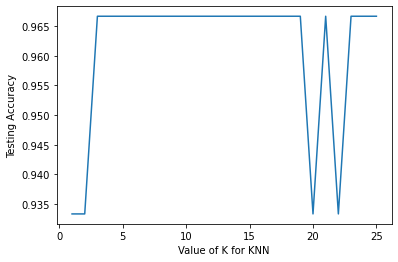

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

In [75]:
#0 = setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}

#Making prediction on some unseen data 
#predict for the below two random observations
x_new = [[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

setosa
setosa
